## DecisionTree 분류 모델을 이용한 분류

In [ ]:
### sklearn 라이브러리 설치
!pip install scikit-learn

### 데이터 불러오기

In [ ]:
### 필요한 라이브러리 import
import pandas as pd
import numpy as np

In [ ]:
### 데이터 불러오기

# 파일 경로 설정
file_path = '/content/drive/MyDrive/데이터 분석/iris_dataset.csv'

# pd.read_csv() 함수 --> DataFrame 자료형 생성
df_iris = pd.read_csv(file_path)

# 결과 확인하기
print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         label  
0       se

### 데이터 전처리

In [ ]:
### 붓꽃 품종의 정답 label --> 숫자 --> label encoding 실행

# 붓꽃 품종 종류 --> 알파벳 순으로 정리 --> np.unique()
arr = df_iris.loc[:,'label'].values
kinds = np.unique(ar=arr)
print(f'붓꽃 품종의 종류 확인 : \n{kinds}')

# replace() 사용 --> label 컬럼의 값 수정 : 문자열 --> 숫자
df_iris.loc[:,'label'] = df_iris.loc[:,'label'].replace({kinds[0]:0,
                                                     kinds[1]:1,
                                                     kinds[2]:2})

# 결과 확인하기
print(df_iris)

붓꽃 품종의 종류 확인 : 
['setosa' 'versicolor' 'virginica']
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5

<ipython-input-4-8effdbde166d>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_iris.loc[:,'label'] = df_iris.loc[:,'label'].replace({kinds[0]:0,


### 학습용 데이터와 평가용 데이터 생성

In [ ]:
### 80:20의 비율로 학습용 데이터와 평가용 데이터 생성

# 필요한 함수 import
from sklearn.model_selection import train_test_split

# X_data 생성
X_data = df_iris.drop(columns=['label'])
print(f'X 데이터 확인 : \n{X_data}')

print('-'*80)

# Y_data 생성
y_data = df_iris.loc[:,'label']
print(f'y 데이터 확인 : \n{y_data}')

print('-'*80)

# train_test_split() 함수 사용 --> 결과 값 : 4가지
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y_data)

X 데이터 확인 : 
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
----------------------------

In [ ]:
### 학습용 데이터 확인

# 데이터의 자료형 확인
print(f'X_train의 자료형 : {type(X_train)}')
print('-'*80)
print(f'y_train의 자료형 : {type(y_train)}')

print('-'*80)

# 데이터의 모양 확인
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')

print('-'*80)

# 데이터의 인덱스 확인
x_index = X_train.index
y_index = y_train.index
print(f'X_train의 인덱스 : \n{x_index}')
print('-'*80)
print(f'y_train의 인덱스 : \n{y_index}')

X_train의 자료형 : <class 'pandas.core.frame.DataFrame'>
--------------------------------------------------------------------------------
y_train의 자료형 : <class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
X_train의 모양 : (120, 4)
--------------------------------------------------------------------------------
y_train의 모양 : (120,)
--------------------------------------------------------------------------------
X_train의 인덱스 : 
Int64Index([ 45,   1,  38,   7,  82,  37, 108, 124,  72, 127,
            ...
            130, 138,  29,  64,  52, 145,  34, 117, 128, 106],
           dtype='int64', length=120)
--------------------------------------------------------------------------------
y_train의 인덱스 : 
Int64Index([ 45,   1,  38,   7,  82,  37, 108, 124,  72, 127,
            ...
            130, 138,  29,  64,  52, 145,  34, 117, 128, 106],
           dtype='int64', length=120)


In [ ]:
### 학습용 데이터 --> 정답의 빈도수 확인
print(y_train.value_counts())

0    40
1    40
2    40
Name: label, dtype: int64


### 모델 생성

In [ ]:
### 필요한 함수 import
from sklearn.tree import DecisionTreeClassifier

In [ ]:
### 모델 생성 함수 호출, 모델 생성
dt = DecisionTreeClassifier(random_state=0)

### 모델 학습

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### 모델 학습 시 생성된 의사 결정 트리 시각화

In [ ]:
### 학습 시 생성된 의사 결정 트리의 깊이 확인
print(dt.get_depth())

4


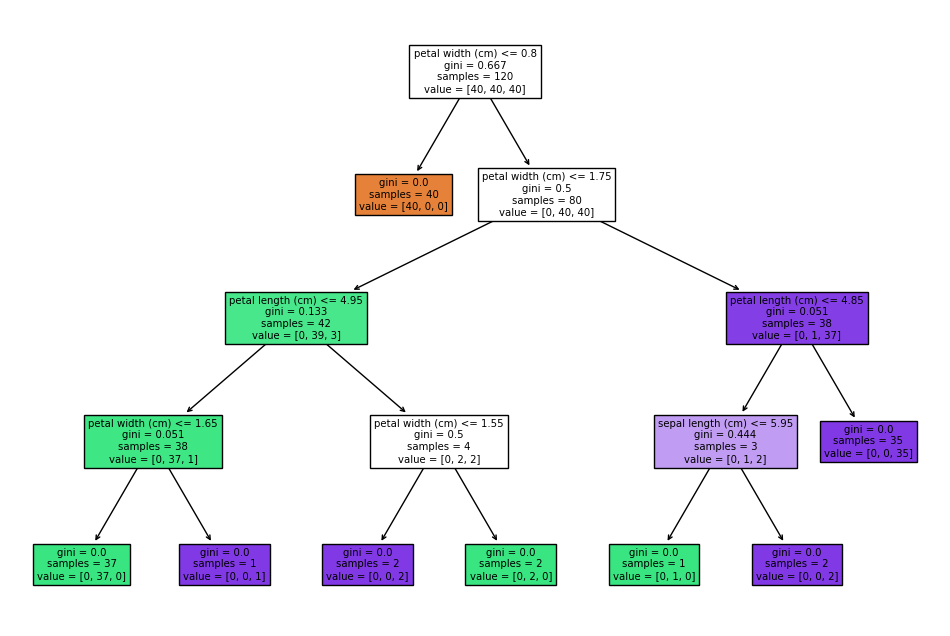

In [ ]:
### 학습 시 생성된 의사 결정 트리 시각화

# 필요한 라이브러리 / 함수 import
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 이미지의 크기 재설정
plt.figure(figsize=(12, 8))

# 시각화
plot_tree(dt, feature_names=X_train.columns, filled=True)
plt.show()

### 평가용 데이터를 이용한 예측

In [ ]:
### 평가용 데이터를 이용한 예측
pred_test = dt.predict(X_test)
print(f'평가용 데이터에 대한 예측 : \n{pred_test}')

평가용 데이터에 대한 예측 : 
[0 1 0 2 0 1 2 0 0 1 2 1 1 2 1 2 2 1 1 0 0 2 2 1 0 1 1 2 0 0]


In [ ]:
### 평가용 정답 확인
print(f'평가용 데이터에 대한 정답 : \n{y_test.values}')

평가용 데이터에 대한 정답 : 
[0 1 0 2 0 1 2 0 0 1 2 1 1 2 1 2 2 1 1 0 0 2 2 2 0 1 1 2 0 0]


In [ ]:
### 평가용 데이터에 대한 예측의 정확도 측정 --> 비교 연산
accuracy = (y_test == pred_test)
num_true = accuracy.sum()
print(f'평가용 데이터에 대해서 맞힌 개수 = {num_true}개')
print('-'*80)
accuracy_score = num_true/y_test.size
print(f'평가용 데이터에 대한 정확도 = {accuracy_score}')

평가용 데이터에 대해서 맞힌 개수 = 29개
--------------------------------------------------------------------------------
평가용 데이터에 대한 정확도 = 0.9666666666666667


### 모델 평가

In [ ]:
# 필요한 함수 import
from sklearn.metrics import accuracy_score

# 평가용 데이터에 대한 정확도 측정(평가)
accuracy = accuracy_score(y_test, pred_test)

# 결과 확인하기
print(f'평가용 데이터에 대한 정확도 = {accuracy}')

평가용 데이터에 대한 정확도 = 0.9666666666666667


### GridSearchCV를 이용한 모델 성능 최적화

In [ ]:
### GridSearchCV 함수 실행

# 필요한 함수 import
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 최적화 할 기본 모델 생성
base_dt = DecisionTreeClassifier(random_state=0)

# 튜닝할 하이퍼파라미터 설정
params = {'max_depth':[3,4,5,6,7,8,9]}

# GridSearchCV 함수 실행, 모델 생성
grid_dt = GridSearchCV(estimator=base_dt,
                       param_grid=params,
                       scoring='accuracy',
                       cv=10)

# 학습 및 평가
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

#### 모델 생성

In [ ]:
### 최적의 하이퍼파라미터 확인
print(grid_dt.best_params_)

{'max_depth': 5}


In [ ]:
### best 모델 생성
best_dt = DecisionTreeClassifier(max_depth=5,
                                 random_state=0)

#### 모델 학습

In [ ]:
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

#### 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_dt.predict(X_test)

#### 모델 평가

In [ ]:
# 필요한 함수 import
from sklearn.metrics import accuracy_score

# 평가용 데이터를 이용한 정확도 평가
accuracy = accuracy_score(y_test, pred_test)

# 결과 확인하기
print(f'평가용 데이터에 대한 평가 결과 : \n{accuracy}')

평가용 데이터에 대한 평가 결과 : 
0.9666666666666667
